In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
from tensorflow.keras.datasets import mnist

In [86]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Visualising the data

In [87]:
x_train.shape

(60000, 28, 28)

In [147]:
x_test[0].shape

(28, 28, 1)

In [89]:
single_image = x_train[0]

In [90]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [91]:
single_image.shape

(28, 28)

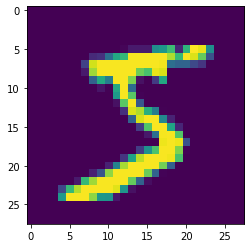

In [92]:
plt.imshow(single_image)

In [93]:
y_train[0]

5

In [94]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### these are categorical values, translate them to 'one-hot-encoding' so our cnn could understand. 

In [95]:
from tensorflow.keras.utils import to_categorical

In [96]:
y_train.shape

(60000,)

In [97]:
y_train = to_categorical(y_train)

In [98]:
y_train.shape

(60000, 10)

In [99]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [100]:
y_test.shape

(10000,)

In [101]:
y_test = to_categorical(y_test, num_classes=10)

In [102]:
y_test.shape

(10000, 10)

In [103]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

### Normalise the x-data

In [148]:
x_train[0].shape

(28, 28, 1)

In [105]:
x_train.max()

255

In [106]:
x_train.min()

0

In [149]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [107]:
x_train = x_train/255
x_test = x_test/255

In [108]:
x_train.max()
x_train.min()

0.0

In [109]:
x_test.min()

0.0

In [110]:
scaled_single_image = x_train[0]

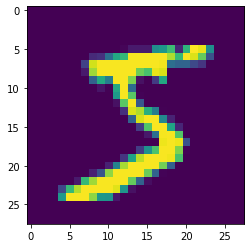

In [111]:
plt.imshow(scaled_single_image)

In [112]:
scaled_single_image.shape

(28, 28)

### Reshape the data - add one more dimension to show 1RGB channel

In [113]:
x_train.shape

(60000, 28, 28)

In [114]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [115]:
x_train.shape

(60000, 28, 28, 1)

In [116]:
x_test.shape

(10000, 28, 28)

In [117]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [118]:
x_test.shape

(10000, 28, 28, 1)

## Training the model

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [120]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [121]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [122]:
from tensorflow.keras.callbacks import EarlyStopping

In [123]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3 )

## Training

In [124]:
model.fit(x=x_train, y=y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 435us/sample - loss: 0.1419 - accuracy: 0.9575 - val_loss: 0.0587 - val_accuracy: 0.9804
Epoch 2/10
60000/60000 [==============================] - 27s 456us/sample - loss: 0.0493 - accuracy: 0.9849 - val_loss: 0.0607 - val_accuracy: 0.9799
Epoch 3/10
60000/60000 [==============================] - 32s 540us/sample - loss: 0.0325 - accuracy: 0.9893 - val_loss: 0.0556 - val_accuracy: 0.9816
Epoch 4/10
60000/60000 [==============================] - 30s 502us/sample - loss: 0.0219 - accuracy: 0.9927 - val_loss: 0.0464 - val_accuracy: 0.9856
Epoch 5/10
60000/60000 [==============================] - 29s 490us/sample - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0413 - val_accuracy: 0.9874
Epoch 6/10
60000/60000 [==============================] - 29s 483us/sample - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.0461 - val_accuracy: 0.9872
Epoch 7/10
60000/60000 [====================

### Evaluation

In [46]:
model.metrics_names

['loss', 'accuracy']

In [47]:
losses = pd.DataFrame(model.history.history)

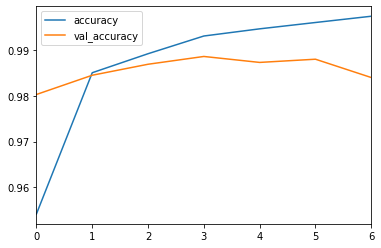

In [48]:
losses[['accuracy','val_accuracy']].plot()

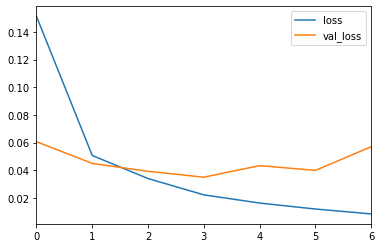

In [49]:
losses[['loss','val_loss']].plot()

In [127]:
import cv2 as cv

In [273]:
image = cv.imread('D:\\personal\\Workplace\\GitRepos\\Machine Learning\\MNIST-handwritten\\test\\6_2.jpg', 
                 cv.IMREAD_GRAYSCALE)

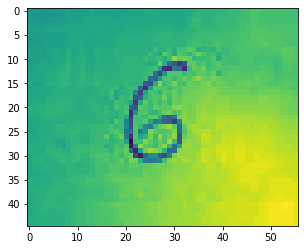

In [274]:
plt.imshow(image)

In [275]:
image.shape

(45, 56)

In [276]:
img_gray = cv.resize(255-image, (28, 28))

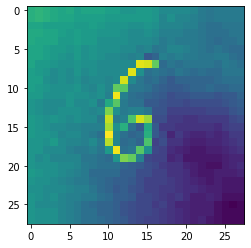

In [277]:
plt.imshow(img_gray)

In [270]:
(thresh, img_gray) = cv.threshold(img_gray, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

In [271]:
thresh

69.0

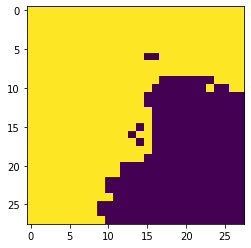

In [272]:
plt.imshow(img_gray)

In [262]:
img_laplacian = cv.Laplacian(img_gray,cv.CV_64F)

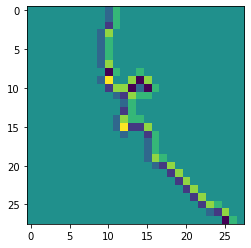

In [263]:
plt.imshow(img_laplacian)

In [264]:
edges = cv.Canny(img_gray,28,28)

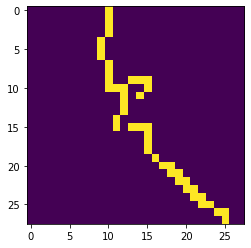

In [265]:
plt.imshow(edges)

In [278]:
img_gray = img_gray.reshape(28, 28, 1)

In [279]:
img_gray.shape

(28, 28, 1)

In [280]:
img_gray

array([[[ 83],
        [ 84],
        [ 83],
        [ 82],
        [ 81],
        [ 82],
        [ 80],
        [ 81],
        [ 81],
        [ 81],
        [ 80],
        [ 80],
        [ 78],
        [ 78],
        [ 79],
        [ 79],
        [ 78],
        [ 76],
        [ 76],
        [ 76],
        [ 76],
        [ 75],
        [ 73],
        [ 72],
        [ 73],
        [ 73],
        [ 73],
        [ 73]],

       [[ 83],
        [ 84],
        [ 83],
        [ 82],
        [ 81],
        [ 81],
        [ 80],
        [ 80],
        [ 80],
        [ 80],
        [ 79],
        [ 79],
        [ 79],
        [ 79],
        [ 79],
        [ 79],
        [ 78],
        [ 75],
        [ 77],
        [ 75],
        [ 75],
        [ 74],
        [ 73],
        [ 72],
        [ 73],
        [ 73],
        [ 73],
        [ 73]],

       [[ 81],
        [ 81],
        [ 80],
        [ 80],
        [ 80],
        [ 80],
        [ 79],
        [ 79],
        [ 80],
        [ 79],
      

In [281]:
img_gray = img_gray/ 255

In [282]:
img_gray

array([[[0.3254902 ],
        [0.32941176],
        [0.3254902 ],
        [0.32156863],
        [0.31764706],
        [0.32156863],
        [0.31372549],
        [0.31764706],
        [0.31764706],
        [0.31764706],
        [0.31372549],
        [0.31372549],
        [0.30588235],
        [0.30588235],
        [0.30980392],
        [0.30980392],
        [0.30588235],
        [0.29803922],
        [0.29803922],
        [0.29803922],
        [0.29803922],
        [0.29411765],
        [0.28627451],
        [0.28235294],
        [0.28627451],
        [0.28627451],
        [0.28627451],
        [0.28627451]],

       [[0.3254902 ],
        [0.32941176],
        [0.3254902 ],
        [0.32156863],
        [0.31764706],
        [0.31764706],
        [0.31372549],
        [0.31372549],
        [0.31372549],
        [0.31372549],
        [0.30980392],
        [0.30980392],
        [0.30980392],
        [0.30980392],
        [0.30980392],
        [0.30980392],
        [0.30588235],
        

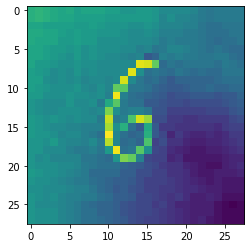

In [283]:
plt.imshow(img_gray.reshape(28, 28))

In [284]:
model.predict_classes(img_gray.reshape(1, 28, 28, 1))

array([1], dtype=int64)

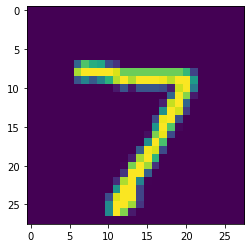

In [163]:
plt.imshow(x_test[0].reshape(28, 28))

In [52]:
from PIL import Image

In [78]:
img = Image.open('D:\\personal\\Workplace\\GitRepos\\Machine Learning\\MNIST-handwritten\\test\\7.jpg').convert("L")


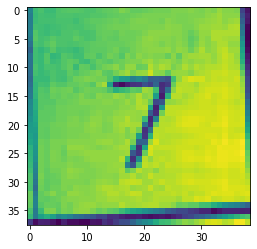

In [79]:
plt.imshow(img)

In [80]:
img = np.resize(img, (28, 28, 1))

In [81]:
im2arr = np.array(img)

In [82]:
im2arr = im2arr.reshape(1, 28, 28, 1)

In [83]:
model.predict_classes(im2arr.astype('float32'))

array([8], dtype=int64)

In [125]:
from tensorflow.keras.utils import normalize

In [143]:
def predict_img_method_1(image):
    img_array = cv.bitwise_not(image)
    new_array = cv.resize(img_array, (28,28))
    
    user_test = normalize(new_array, axis = 1)
#     user_test = user_test.reshape(1, 28, 28, 1)
    predicted = model.predict(user_test.reshape(1, 28, 28, 1))
    a = predicted[0][0]
    for i in range(0,10):
      b = predicted[0][i]
      print("Probability Distribution for",i,b)
    
    print("The Predicted Value is",np.argmax(predicted[0]))

In [144]:
image = cv.imread('D:\\personal\\Workplace\\GitRepos\\Machine Learning\\MNIST-handwritten\\test\\8.jpg', 
                 cv.IMREAD_GRAYSCALE)

In [145]:
image

array([[173, 172, 173, ..., 187, 187, 187],
       [172, 172, 173, ..., 187, 187, 187],
       [172, 173, 173, ..., 187, 187, 187],
       ...,
       [185, 186, 187, ..., 204, 204, 204],
       [186, 187, 187, ..., 203, 203, 203],
       [187, 186, 185, ..., 205, 205, 204]], dtype=uint8)

In [146]:
predict_value(image)

Probability Distribution for 0 0.087303884
Probability Distribution for 1 0.1620768
Probability Distribution for 2 0.09607713
Probability Distribution for 3 0.08630102
Probability Distribution for 4 0.09189489
Probability Distribution for 5 0.10828498
Probability Distribution for 6 0.09256742
Probability Distribution for 7 0.12611762
Probability Distribution for 8 0.06330311
Probability Distribution for 9 0.08607307
The Predicted Value is 1


In [291]:
def preprocess(gray):
    while np.sum(gray[0]) == 0:
        gray = gray[1:]

    while np.sum(gray[:,0]) == 0:
        gray = np.delete(gray,0,1)

    while np.sum(gray[-1]) == 0:
        gray = gray[:-1]
    
    while np.sum(gray[:,-1]) == 0:
        gray = np.delete(gray,-1,1)

    rows,cols = gray.shape()
    
    if rows > cols:
        factor = 20.0/rows
        rows = 20
        cols = int(round(cols*factor))
        gray = cv2.resize(gray, (cols,rows))
    
    else:
        factor = 20.0/cols
        cols = 20
        rows = int(round(rows*factor))
        gray = cv2.resize(gray, (cols, rows))
        
    olsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
    rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
    gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')
    
    return gray

In [292]:
def predict_value_method_2(image):
    plt.imshow(image)
    img_gray = cv.resize(255-image, (28, 28))
    (thresh, img_gray) = cv.threshold(img_gray, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
#     plt.imshow(img_gray)
    img_gray = img_gray.reshape(28, 28, 1)
    img_gray = img_gray/ 255
#     return img_gray
    
    img_gray = preprocess(img_gray)
    predicted = model.predict(img_gray.reshape(1, 28, 28, 1))
    a = predicted[0][0]
#     for i in range(0,10):
#       b = predicted[0][i]
#       print("Probability Distribution for",i,b)
    
    print("The Predicted Value is",np.argmax(predicted[0]))

In [168]:
image8 = cv.imread('D:\\personal\\Workplace\\GitRepos\\Machine Learning\\MNIST-handwritten\\test\\8.jpg', 
                 cv.IMREAD_GRAYSCALE)

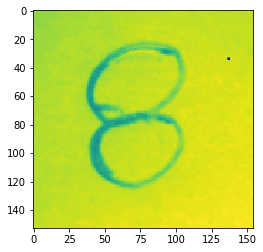

In [169]:
plt.imshow(image8)

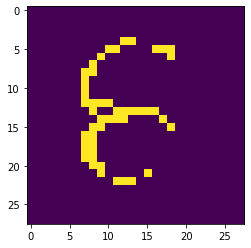

In [170]:
predict_value_method_2(image8)

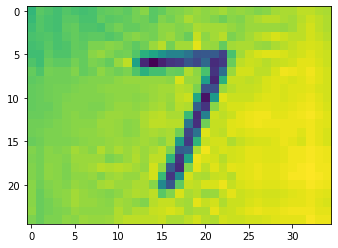

In [183]:
image7 = cv.imread('D:\\personal\\Workplace\\GitRepos\\Machine Learning\\MNIST-handwritten\\test\\7.jpg', 
                 cv.IMREAD_GRAYSCALE)
plt.imshow(image7)

Probability Distribution for 0 1.0203689e-09
Probability Distribution for 1 3.5408942e-05
Probability Distribution for 2 1.9803718e-05
Probability Distribution for 3 0.012223725
Probability Distribution for 4 1.4836998e-16
Probability Distribution for 5 9.7522054e-14
Probability Distribution for 6 2.8197394e-15
Probability Distribution for 7 0.98772067
Probability Distribution for 8 7.6072844e-08
Probability Distribution for 9 1.8126956e-07
The Predicted Value is 7


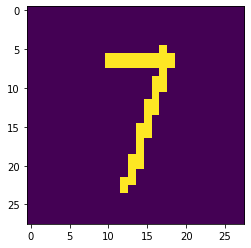

In [184]:
predict_value_method_2(image7)

In [176]:
img.shape

(28, 28, 1)

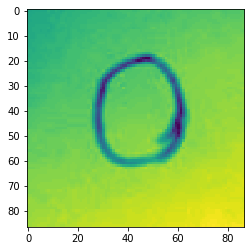

In [185]:
image0 = cv.imread('D:\\personal\\Workplace\\GitRepos\\Machine Learning\\MNIST-handwritten\\test\\0.jpg', 
                 cv.IMREAD_GRAYSCALE)
plt.imshow(image0)

Probability Distribution for 0 0.96337104
Probability Distribution for 1 9.482285e-10
Probability Distribution for 2 0.00013058496
Probability Distribution for 3 3.1839681e-06
Probability Distribution for 4 2.2539613e-08
Probability Distribution for 5 7.3905284e-07
Probability Distribution for 6 4.5956654e-06
Probability Distribution for 7 8.1449125e-06
Probability Distribution for 8 0.0003362203
Probability Distribution for 9 0.036145505
The Predicted Value is 0


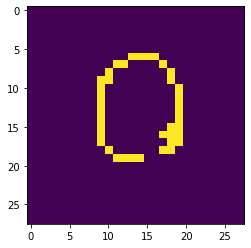

In [186]:
predict_value_method_2(image0)

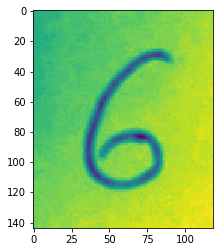

In [231]:
image6 = cv.imread('D:\\personal\\Workplace\\GitRepos\\Machine Learning\\MNIST-handwritten\\test\\6_3.jpg', 
                 cv.IMREAD_GRAYSCALE)
plt.imshow(image6)

The Predicted Value is 6


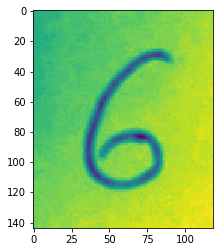

In [232]:
predict_value_method_2(image6)

In [289]:
def run_pred():
    folder = 'D:\\personal\\Workplace\\GitRepos\\Machine Learning\\MNIST-handwritten\\test'
    for filename in os.listdir(folder):
        file = os.path.join(folder,filename)
        print(file)
        img = cv.imread(file,cv.IMREAD_GRAYSCALE)
#         plt.imshow(img);
        predict_value_method_2(img)

In [226]:
import os

D:\personal\Workplace\GitRepos\Machine Learning\MNIST-handwritten\test\0.jpg
The Predicted Value is 0
D:\personal\Workplace\GitRepos\Machine Learning\MNIST-handwritten\test\2.jpg
The Predicted Value is 2
D:\personal\Workplace\GitRepos\Machine Learning\MNIST-handwritten\test\2_blur.jpg
The Predicted Value is 6
D:\personal\Workplace\GitRepos\Machine Learning\MNIST-handwritten\test\3.jpg
The Predicted Value is 3
D:\personal\Workplace\GitRepos\Machine Learning\MNIST-handwritten\test\3_2.jpg
The Predicted Value is 3
D:\personal\Workplace\GitRepos\Machine Learning\MNIST-handwritten\test\4.jpg
The Predicted Value is 4
D:\personal\Workplace\GitRepos\Machine Learning\MNIST-handwritten\test\4_2.jpg
The Predicted Value is 5
D:\personal\Workplace\GitRepos\Machine Learning\MNIST-handwritten\test\5.jpg
The Predicted Value is 5
D:\personal\Workplace\GitRepos\Machine Learning\MNIST-handwritten\test\6.jpg
The Predicted Value is 5
D:\personal\Workplace\GitRepos\Machine Learning\MNIST-handwritten\test\6_

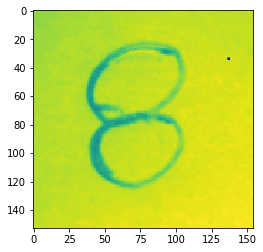

In [233]:
run_pred()

D:\personal\Workplace\GitRepos\Machine Learning\MNIST-handwritten\test\0.jpg


TypeError: 'tuple' object is not callable

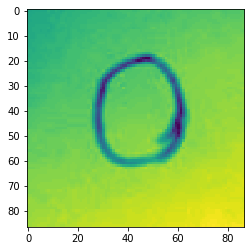

In [293]:
run_pred()